In [1]:
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words =10000)

17464789/17464789 [==============================] - 11s 1us/step


In [4]:
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i,sequences in enumerate(sequences):
        results[i, sequences] = 1
        return results
x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [8]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20


35/35 [==============================] - 3s 55ms/step - loss: 0.2500 - accuracy: 0.5021 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 2/20
35/35 [==============================] - 1s 15ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 3/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 4/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 5/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 6/20
35/35 [==============================] - 0s 13ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2501 - val_accuracy: 0.4933
Epoch 7/20
35/35 [==============================] - 0s 11ms/step - loss: 0.2500 - accuracy: 0.5029 - val_loss: 0.2500 - val_accuracy: 0.4933
Epoch 8/20


In [11]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


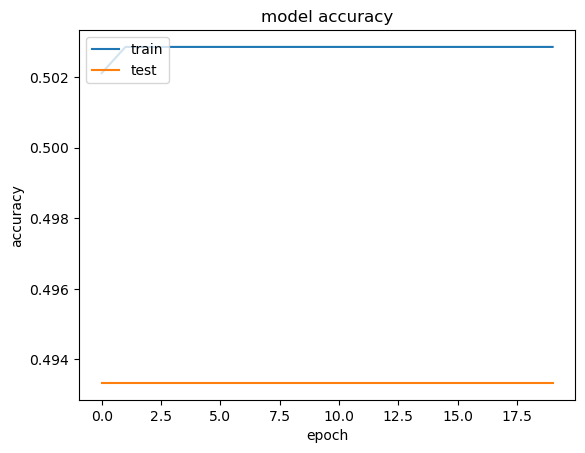

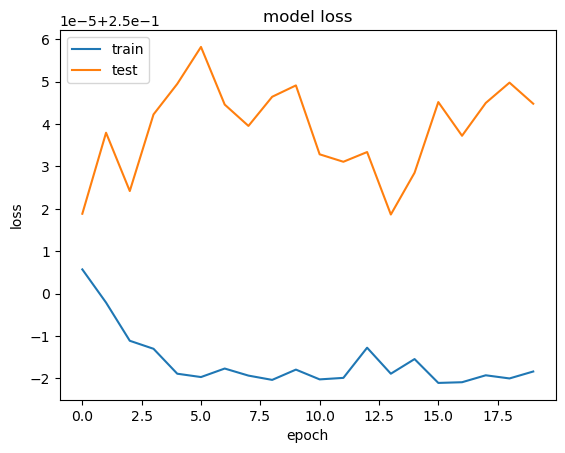

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()